# Data Preparation and EDA

Project: **Predicting Shipment Outcomes and Inferring Causes of Potential Disruptions**  
Created by: **Fauzan Pasaribu**

The objective of the project is to create a model that can predict the shipment outcome of a particular order item. If the model predicts that the shipment of the order item encounters disruptions, the model would then deduce the causes of such disruption.

**The aim of this notebook is to prepare the dataset that will be used for the project, as well as perform an exploratory data analysis of the cleaned data.**

# Contents
1. [Dataset](#Dataset)<br>
2. [Data Dictionary](#Data-Dictionary)<br>
3. [Data Loading](#Data-Loading)<br>
4. [Data Wrangling](#Data-Wrangling)<br>
5. [Data Cleaning](#Data-Cleaning)<br>
    a. [Dropping Redundant and Duplicate Columns](#Dropping-Redundant-and-Duplicate-Columns)<br>
    b. [Duplicate Rows](#Duplicate-Rows)<br>
    c. [Null Values (NaN)](#Null-Values-(NaN))<br>
6. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))<br>
    a. [Target Variable](#Target-Variable)<br>
    b. [Predictor Variables: Categorical](#Predictor-Variables:-Categorical)<br>
    c. [Predictor Variables: Numerical](#Predictor-Variables:-Numerical)<br>
    d. [Detecting Outliers](#Detecting-Outliers)<br>
7. [Further Data Cleaning](#Further-Data-Cleaning)<br>
8. [Saving the Data](#Saving-the-Data)<br>

## Dataset

The dataset used in this project is acquired from [Kaggle](https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis). This dataset was used by DataCo Global, a data analytics consulting company. The dataset contains information about the supply chain of an unidentified company. The data entails information of order items that are delivered from the "customer" (the entity who made purchase of the delivery - the origin of the shipment) to the "buyer" (the entity who made the order from the customer - the destination of the shipment). The data also includes the delivery status of the orders, the product information in the order, the geographic location of the customers and the buyers, the transaction type, and the profit and sales information of the orders.

## Data Dictionary

The data dictionary was provided in [Kaggle](https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis) along with the dataset. Here is a preview: 

FIELDS                       |DESCRIPTION                                                                                                                                                                                                                                                                                                                                                                                    
-----------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Type                         |  Type of transaction made                                                                                                                                                                                                                                                                                                                                                                    
Days for shipping (real)     |  Actual shipping days of the purchased product                                                                                                                                                                                                                                                                                                                                               
Days for shipment (scheduled)|  Days of scheduled delivery of the purchased product                                                                                                                                                                                                                                                                                                                                         
Benefit per order            |  Earnings per order placed                                                                                                                                                                                                                                                                                                                                                                   
Sales per customer           |  Total sales per customer made per customer                                                                                                                                                                                                                                                                                                                                                  
Delivery Status              |  Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on time                                                                                                                                                                                                                                                                                          
Late_delivery_risk           |  Categorical variable that indicates if sending is late (1), it is not late (0).                                                                                                                                                                                                                                                                                                             
Category Id                  |  Product category code                                                                                                                                                                                                                                                                                                                                                                       
Category Name                |  Description of the product category                                                                                                                                                                                                                                                                                                                                                         
Customer City                |  City where the customer made the purchase                                                                                                                                                                                                                                                                                                                                                   
Customer Country             |  Country where the customer made the purchase                                                                                                                                                                                                                                                                                                                                                
Customer Email               |  Customer's email                                                                                                                                                                                                                                                                                                                                                                           
Customer Fname               |  Customer name                                                                                                                                                                                                                                                                                                                                                                              
Customer Id                  |  Customer ID                                                                                                                                                                                                                                                                                                                                                                                 
Customer Lname               |  Customer lastname                                                                                                                                                                                                                                                                                                                                                                           
Customer Password            |  Masked customer key                                                                                                                                                                                                                                                                                                                                                                         
Customer Segment             |  Types of Customers: Consumer , Corporate , Home Office                                                                                                                                                                                                                                                                                                                                     
Customer State               |  State to which the store where the purchase is registered belongs                                                                                                                                                                                                                                                                                                                           
Customer Street              |  Street to which the store where the purchase is registered belongs                                                                                                                                                                                                                                                                                                                          
Customer Zipcode             |  Customer Zipcode                                                                                                                                                                                                                                                                                                                                                                            
Department Id                |  Department code of store                                                                                                                                                                                                                                                                                                                                                                   
Department Name              |  Department name of store                                                                                                                                                                                                                                                                                                                                                                   
Latitude                     |  Latitude corresponding to location of store                                                                                                                                                                                                                                                                                                                                                 
Longitude                    |  Longitude corresponding to location of store                                                                                                                                                                                                                                                                                                                                                
Market                       |  Market to where the order is delivered : Africa , Europe , LATAM , Pacific Asia , USCA                                                                                                                                                                                                                                                                                                      
Order City                   |  Destination city of the order                                                                                                                                                                                                                                                                                                                                                               
Order Country                |  Destination country of the order                                                                                                                                                                                                                                                                                                                                                           
Order Customer Id            |  Customer order code                                                                                                                                                                                                                                                                                                                                                                        
order date (DateOrders)      |  Date on which the order is made                                                                                                                                                                                                                                                                                                                                                             
Order Id                     |  Order code                                                                                                                                                                                                                                                                                                                                                                                  
Order Item Cardprod Id       |  Product code generated through the RFID reader                                                                                                                                                                                                                                                                                                                                              
Order Item Discount          |  Order item discount value                                                                                                                                                                                                                                                                                                                                                                   
Order Item Discount Rate     |  Order item discount percentage                                                                                                                                                                                                                                                                                                                                                              
Order Item Id                |  Order item code                                                                                                                                                                                                                                                                                                                                                                             
Order Item Product Price     |  Price of products without discount                                                                                                                                                                                                                                                                                                                                                          
Order Item Profit Ratio      |  Order Item Profit Ratio                                                                                                                                                                                                                                                                                                                                                                     
Order Item Quantity          |  Number of products per order                                                                                                                                                                                                                                                                                                                                                                
Sales                        |  Value in sales                                                                                                                                                                                                                                                                                                                                                                              
Order Item Total             |  Total amount per order                                                                                                                                                                                                                                                                                                                                                                      
Order Profit Per Order       |  Order Profit Per Order                                                                                                                                                                                                                                                                                                                                                                     
Order Region                 |  Region of the world where the order is delivered :  Southeast Asia ,South Asia ,Oceania ,Eastern Asia, West Asia , West of USA , US Center , West Africa, Central Africa ,North Africa ,Western Europe ,Northern , Caribbean , South America ,East Africa ,Southern Europe , East of USA ,Canada ,Southern Africa , Central Asia ,  Europe , Central America, Eastern Europe , South of  USA
Order State                  |  State of the region where the order is delivered                                                                                                                                                                                                                                                                                                                                            
Order Status                 |  Order Status : COMPLETE , PENDING , CLOSED , PENDING_PAYMENT ,CANCELED , PROCESSING ,SUSPECTED_FRAUD ,ON_HOLD ,PAYMENT_REVIEW                                                                                                                                                                                                                                                               
Product Card Id              |  Product code                                                                                                                                                                                                                                                                                                                                                                                
Product Category Id          |  Product category code                                                                                                                                                                                                                                                                                                                                                                       
Product Description          |  Product Description                                                                                                                                                                                                                                                                                                                                                                         
Product Image                |  Link of visit and purchase of the product                                                                                                                                                                                                                                                                                                                                                   
Product Name                 |  Product Name                                                                                                                                                                                                                                                                                                                                                                                
Product Price                |  Product Price                                                                                                                                                                                                                                                                                                                                                                               
Product Status               |  Status of the product stock :If it is 1 not available , 0 the product is available                                                                                                                                                                                                                                                                                                          
Shipping date (DateOrders)   |  Exact date and time of shipment                                                                                                                                                                                                                                                                                                                                                             
Shipping Mode                |  The following shipping modes are presented : Standard Class , First Class , Second Class , Same Day                                                                                                                                                                                                                                                                                         

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The type of letters/characters that are in the dataset file uses **latin1 encoding**. This means there might be special characters that the default encoding format doesn't recognize.

In [2]:
#loading data using latin1 encoding
df = pd.read_csv("Datasets\DataCoSupplyChainDataset.csv", encoding = 'latin-1')

In [3]:
df.sample(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
24590,DEBIT,2,1,63.799999,220.009995,Late delivery,1,65,Consumer Electronics,Salina,...,NaN,1352,65,NaN,http://images.acmesports.sports/Industrial+con...,Industrial consumer electronics,252.880005,0,11/4/2017 20:37,First Class
137068,TRANSFER,6,4,178.550003,371.980011,Late delivery,1,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,6/25/2017 14:09,Standard Class
90568,PAYMENT,6,4,23.809999,56.689999,Late delivery,1,17,Cleats,Caguas,...,NaN,365,17,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,59.990002,0,10/6/2015 19:35,Standard Class
138844,PAYMENT,6,4,3.960000,395.980011,Late delivery,1,45,Fishing,Marrero,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,3/12/2017 23:56,Standard Class
127039,PAYMENT,4,4,41.400002,118.290001,Shipping on time,0,18,Men's Footwear,Caguas,...,NaN,403,18,NaN,http://images.acmesports.sports/Nike+Men%27s+C...,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,0,5/26/2015 22:02,Standard Class


In [4]:
df.shape

(180519, 53)

The dataset has **180,519 observations (rows)** and **53 features (columns)**

## Data Wrangling

Here I am going to make sure the data types are appropriate for each feature.

In [5]:
#viewing the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

There are two "date" columns: `order date (DateOrders)` and `shipping date (DateOrders)`. Both are **object** data types which refers to **categorical** columns. I am going to convert them to a more appropriate data type: **datetime**.

In [6]:
#convert shipping date (DateOrders) to datetime data type
df["shipping date (DateOrders)"] = pd.to_datetime(df["shipping date (DateOrders)"])

In [7]:
#convert order date (DateOrders) to datetime data type
df["order date (DateOrders)"] = pd.to_datetime(df["order date (DateOrders)"])

In [8]:
#sanity check: now both columns are datetime64[ns] dtype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

All the **ID columns** and **Zipcodes** are **int** data types. Although they are numbers, we should treat them as categorical. So, I am going to convert all of them into **object** data type.

In [9]:
#convert all ID columns and Zipcodes to object data type
ID_columns = ["Category Id", "Customer Id", "Department Id", "Order Customer Id", "Order Id", "Order Item Cardprod Id",
             "Order Item Id", "Product Card Id", "Product Category Id", "Order Zipcode", "Customer Zipcode"]
df[ID_columns] = df[ID_columns].astype("object")

In [10]:
#sanity check: now all ID columns and Zipcodes are object dtype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  object        
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

Now that the data types are taken care of, we're all set to move on to Data Cleaning!

## Data Cleaning

### Dropping Redundant and Duplicate Columns

In [11]:
#view columns and number of unique values per column
df.nunique().sort_values()

Product Description                   0
Product Status                        1
Customer Password                     1
Customer Email                        1
Late_delivery_risk                    2
Customer Country                      2
Customer Segment                      3
Type                                  4
Shipping Mode                         4
Delivery Status                       4
Days for shipment (scheduled)         4
Order Item Quantity                   5
Market                                5
Days for shipping (real)              7
Order Status                          9
Department Id                        11
Department Name                      11
Order Item Discount Rate             18
Order Region                         23
Customer State                       46
Category Name                        50
Category Id                          51
Product Category Id                  51
Product Price                        75
Order Item Product Price             75


We can see that there is no values (NaN) in the `Product Description` column. This column would be dropped, as it does not bring any value to our dataset.

In [12]:
#dropping Product Description column
df.drop("Product Description", axis = 1, inplace = True)
#sanity check: from 53 columns to now 52 columns
df.shape

(180519, 52)

`Product Status`, `Customer Password`, `Customer Email` columns all have only one unique value. Before dropping these columns, viewing what that values are might show us some information about the dataset:                    

In [13]:
#viewing the 3 columns:
df[["Product Status", "Customer Password", "Customer Email"]]

,Product Status,Customer Password,Customer Email
0,0,XXXXXXXXX,XXXXXXXXX
1,0,XXXXXXXXX,XXXXXXXXX
2,0,XXXXXXXXX,XXXXXXXXX
3,0,XXXXXXXXX,XXXXXXXXX
4,0,XXXXXXXXX,XXXXXXXXX
...,...,...,...
180514,0,XXXXXXXXX,XXXXXXXXX
180515,0,XXXXXXXXX,XXXXXXXXX
180516,0,XXXXXXXXX,XXXXXXXXX
180517,0,XXXXXXXXX,XXXXXXXXX


The three columns contains no information; therefore, they will be dropped:

In [14]:
#dropping Product Status, Customer Password, Customer Email columns
df.drop(["Product Status", "Customer Password", "Customer Email"], axis = 1, inplace = True)
#sanity check: from 52 columns to now 49 columns
df.shape

(180519, 49)

In [15]:
#view current columns' unique values
df.nunique().sort_values()

Customer Country                      2
Late_delivery_risk                    2
Customer Segment                      3
Type                                  4
Delivery Status                       4
Shipping Mode                         4
Days for shipment (scheduled)         4
Order Item Quantity                   5
Market                                5
Days for shipping (real)              7
Order Status                          9
Department Name                      11
Department Id                        11
Order Item Discount Rate             18
Order Region                         23
Customer State                       46
Category Name                        50
Category Id                          51
Product Category Id                  51
Product Price                        75
Order Item Product Price             75
Order Item Cardprod Id              118
Product Image                       118
Product Name                        118
Product Card Id                     118


Private information of customers, such as their names, in the dataset would not be necessary for the project. Therefore, `Customer Lname` and `Customer Fname` are dropped:

In [16]:
#dropping Customer Lname and Customer Fname columns
df.drop(df[["Customer Lname", "Customer Fname"]], axis = 1, inplace=True)
#sanity check: from 49 columns to now 47 columns
df.shape

(180519, 47)

We can see that there are several ID columns in the dataset. These would not be great predictors if there are corresponding columns that means the same thing. There are some ID columns that have corresponding columns that are descriptive of them; for example, Department ID and Department Name are two columns with the same information, but Description Name column is a descriptive and interpretable counterpart of the corresponding ID. Therefore, ID columns that has a corresponding descriptive column of thme would be dropped, as the ID column, in this case, would serve as a duplicate column. There are 6 such ID columns to be dropped:

- `Department Id`
- `Category Id`
- `Product Category Id`
- `Order Item Cardprod Id`
- `Product Card Id`
- `Order Customer Id`

In [17]:
#dropping the columns from above
df.drop(["Department Id", "Category Id", "Product Category Id", "Order Item Cardprod Id", "Product Card Id", "Order Customer Id"], axis = 1, inplace = True)
#sanity check: from 47 columns to now 41 columns
df.shape

(180519, 41)

In [18]:
df.nunique().sort_values()

Customer Country                      2
Late_delivery_risk                    2
Customer Segment                      3
Type                                  4
Delivery Status                       4
Shipping Mode                         4
Days for shipment (scheduled)         4
Order Item Quantity                   5
Market                                5
Days for shipping (real)              7
Order Status                          9
Department Name                      11
Order Item Discount Rate             18
Order Region                         23
Customer State                       46
Category Name                        50
Order Item Product Price             75
Product Price                        75
Product Name                        118
Product Image                       118
Order Item Profit Ratio             162
Order Country                       164
Sales                               193
Customer City                       563
Order Zipcode                       609


The `Product Image` column only provides a link to the image of the products shipped. The link would be redundant in our analysis. Therefore this column is dropped.

In [19]:
#dropping Product Image
df.drop("Product Image", axis = 1, inplace = True)
#sanity check: from 41 columns to now 40 columns
df.shape

(180519, 40)

### Duplicate Rows

In [20]:
#checking if there are any duplicate data
df.duplicated().sum()

0

The dataset is free from duplicate data! Therefore, no rows are dropped.

### Null Values (NaN)

Columns with a considerable amount of NaNs will be dropped or filled with relevant values depending on the situation. Columns with considerably few NaN values can have the rows with the NaNs dropped. 

In [21]:
#looking at the number NaNs per column
df.isna().sum(axis=0)

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Id                           0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0
Order City                            0
Order Country                         0
order date (DateOrders)               0
Order Id                              0
Order Item Discount                   0
Order Item Discount Rate              0


Only two columns have NaNs: `Customer Zipcode` and `Order Zipcode`.

In [22]:
#Calculting the proportion of null values over the total number of data
df[["Customer Zipcode", "Order Zipcode"]].isna().sum()/df.shape[0]

Customer Zipcode    0.000017
Order Zipcode       0.862397
dtype: float64

86.2% of Order Zipcode data are NaNs. This is considerably high. I will drop `Order Zipcode` column due to the number of NaNs it has. On the other hand, only 0.0017% of `Customer Zipcode` data are NaNs. As only three rows of observations have no customer zipcode data, I will consider dropping those rows. Before dropping, I will view the row first:

In [23]:
#returns the three rows containing NaN in Customer Zipcode column
df[df["Customer Zipcode"].isna()]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,...,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
35704,DEBIT,2,1,66.379997,189.660004,Late delivery,1,Consumer Electronics,CA,EE. UU.,...,189.660004,66.379997,Western Europe,Auvernia-Ródano-Alpes,COMPLETE,NaN,Industrial consumer electronics,252.880005,2017-11-04 18:31:00,First Class
46440,PAYMENT,4,4,10.910000,38.959999,Shipping on time,0,Video Games,CA,EE. UU.,...,38.959999,10.910000,Southeast Asia,Capital Nacional,PENDING_PAYMENT,NaN,Fighting video games,39.750000,2017-12-14 15:18:00,Standard Class
82511,DEBIT,4,4,59.990002,299.959992,Shipping on time,0,Children's Clothing,CA,EE. UU.,...,299.959992,59.990002,Northern Europe,Inglaterra,COMPLETE,NaN,Children's heaters,357.100006,2017-10-30 00:29:00,Standard Class


The three rows above does not entail any pattern meaning that they are just random observations that happen to have no customer zipcode value. If the three observations have similar values or have an underlying pattern on each features, then there might be a reason why the customer zipcode was null. So, in our case, it is safe to drop the three rows.

In [24]:
#dropping Order Zipcode column
df.drop("Order Zipcode", axis=1, inplace=True)
#sanity check: from 40 columns to 39 columns
df.shape

(180519, 39)

In [25]:
#dropping the three rows with NaNs on Customer Zipcode column 
df.dropna(inplace=True)
#sanity check: from 180519 rows to 180516 columns
df.shape

(180516, 39)

In [26]:
#Sanity check: should have no more NaNs in any columns
df.isna().sum(axis=0)

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity 

Our data is now clean and ready for an EDA!

## Exploratory Data Analysis (EDA) 

In this EDA, I will explore the data to address this question: "What are potential predictors of disruptions in the supply chain for a particular order and how do these predictors affect the outcome of the order?"

I would look at and analyze all the univariate distributions:
- histograms for numeric fields
- counts and bar charts for the categorical ones.

I will divide the data into **categorical** and **numerical**.

In [27]:
#categorical data
catcols = df.select_dtypes(["object", "datetime"]).columns
catcols

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Street', 'Customer Zipcode', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id',
       'Order Item Id', 'Order Region', 'Order State', 'Order Status',
       'Product Name', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [28]:
#numerical data
numcols = df.select_dtypes(["float", "int"]).columns
numcols

Index(['Benefit per order', 'Sales per customer', 'Latitude', 'Longitude',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Product Price'],
      dtype='object')

### Target Variable

The **target variable** for our model would be the `Delivery Status`, as this column indicates the supply chain outcome of the orders. At this point, we know that the target variable is a **categorical variable**

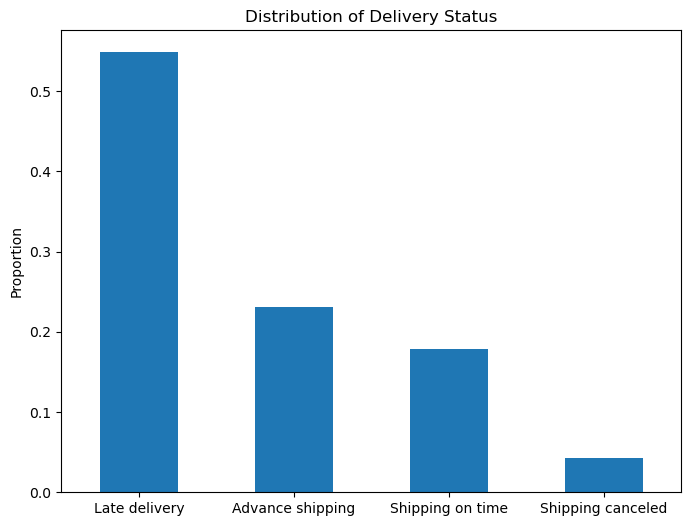

In [42]:
#the distribution of order outcomes (Delivery Status)
plt.figure(figsize=(8,6))
df["Delivery Status"].value_counts(normalize=True).plot(kind="bar",title="Distribution of Delivery Status",ylabel="Proportion")
plt.xticks(rotation=0)
plt.show()

In [30]:
#proportion of order outcomes in percentages (delivery status)
print("Proportion of Delivery Status in Percentages")
df["Delivery Status"].value_counts(normalize=True)*100

Proportion of Delivery Status in Percentages


Late delivery        54.829489
Advance shipping     23.040617
Shipping on time     17.834430
Shipping canceled     4.295464
Name: Delivery Status, dtype: float64

According to the graph above, there are four possible supply chain outcomes for the orders: **Late delivery**, **Advance shipping**, **Shipping on time**, and **Shipping canceled**. There is a class imbalance between the outcomes orders of orders. Most of our data (~55%) have a **Late delivery** outcome while only about 4% are **Shipping canceled**. So, I would have to process my data again to deal with the class imbalance in our target variable.

### Predictor Variables: Categorical

I am going to look at the number of unique values in all our predictor variables that are categorical:

In [31]:
#returns the number of unique values of each categorical columns
df[catcols].nunique().sort_values(ascending=False)

Order Item Id                 180516
order date (DateOrders)        65749
Order Id                       65749
shipping date (DateOrders)     63699
Customer Id                    20649
Customer Street                 7456
Order City                      3597
Order State                     1089
Customer Zipcode                 995
Customer City                    562
Order Country                    164
Product Name                     118
Category Name                     50
Customer State                    44
Order Region                      23
Department Name                   11
Order Status                       9
Market                             5
Type                               4
Delivery Status                    4
Shipping Mode                      4
Customer Segment                   3
Customer Country                   2
dtype: int64

We can see that there are 17 categorical columns that have more than 10 unique values and only 7 columns have fewer than 10 unique values. I am going to plot these 7 columns to see how these **predictor variables** are distributed.

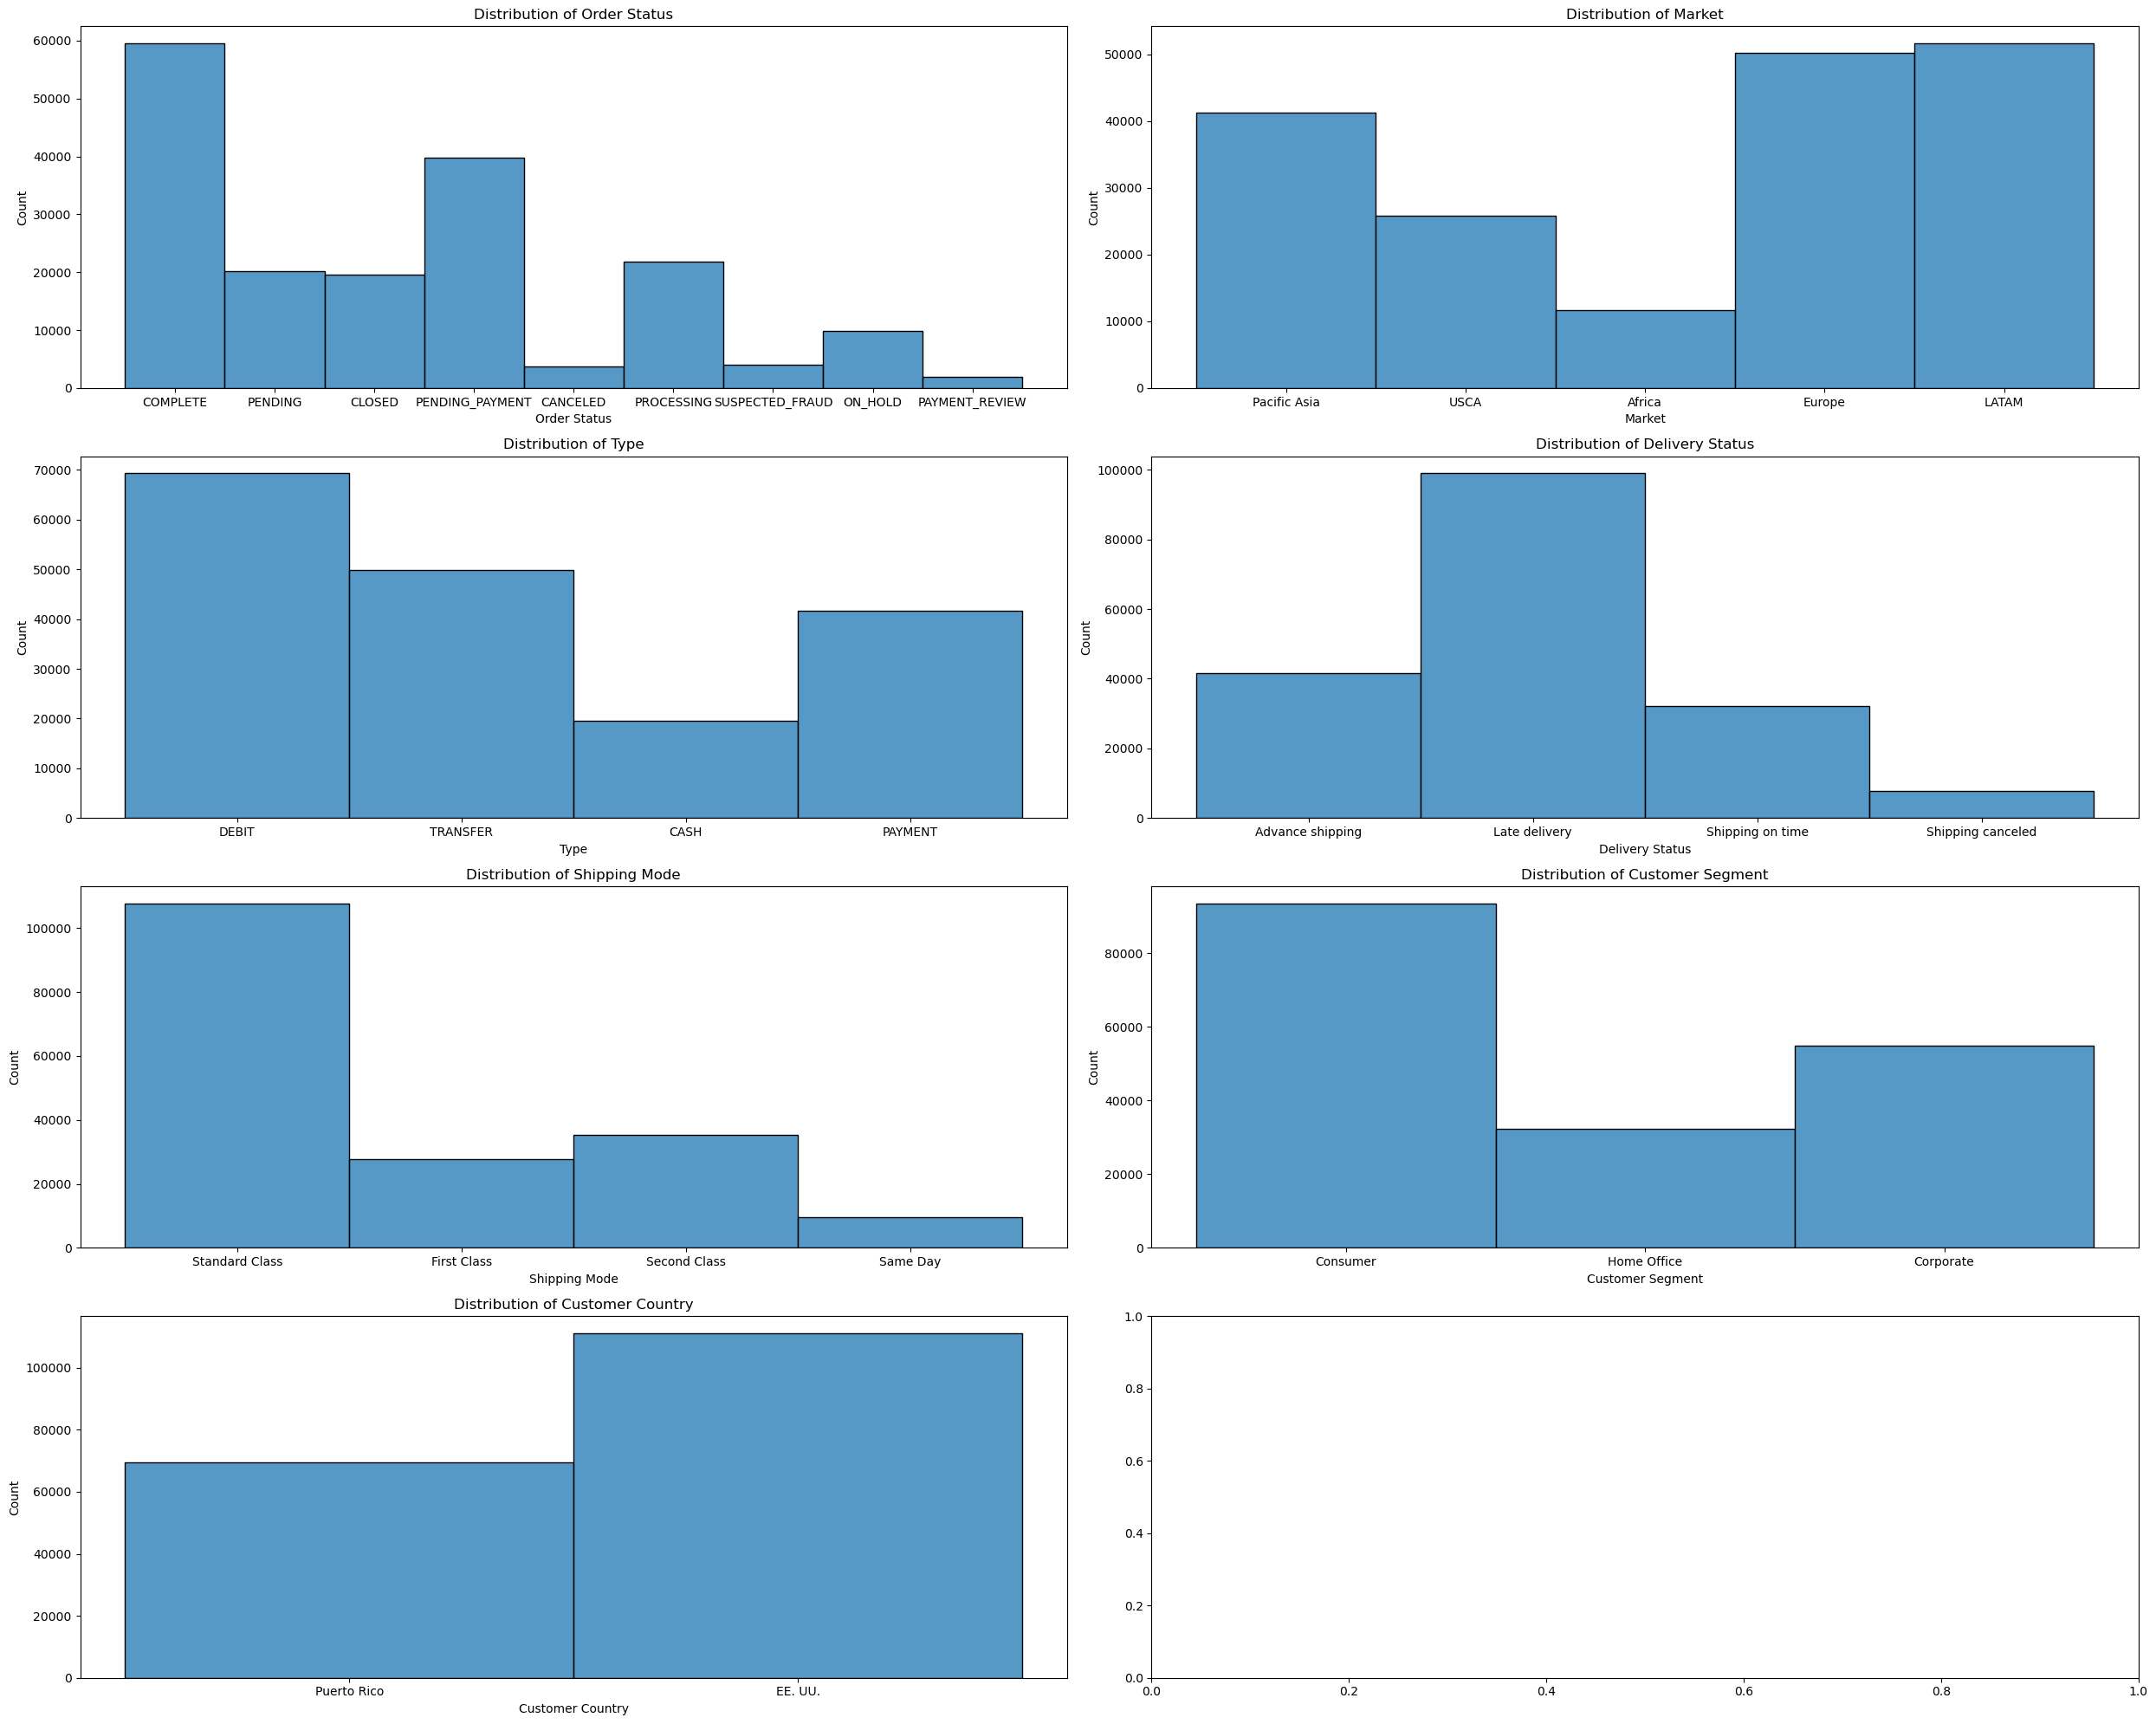

In [32]:
unique = df[catcols].nunique().sort_values(ascending=False)
few_unique = unique[unique<10].index #returns the column names that have fewer than 10 unique values

# Set up a 4x2 grid of subplots
plt.subplots(4,2, figsize=(25,20))

#plots the proportion of each delivery status for every categorical column 
for num, feature in enumerate((df[few_unique].columns), start=1):
    
    # Make a histogram for each feature
    plt.subplot(4, 2, num) # number of rows in the grid, number of columns in the grid, slot number
    sns.histplot(df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    
# This ensures the subplots do not overlap
plt.tight_layout()

# Show the subplots
plt.show()

Summary of Findings:

1. DS by Order Status:
    - There are 9 order status classes.
    - Most Order Status are 'Complete' (majority) and 'Pending Payment'.
    - Very few are 'Canceled', 'Suspected_Fraud', and 'Payment_Review'.
2. DS by Market:
    - Orders are delivered to 5 markets.
    - Most popular market is LATAM followed by Europe (almost equal).
    - The least popular is Africa.
3. DS by Type:
    - There are 4 forms of payments for the order.
    - Most frequent form of payment is 'Debit'
    - Least frequent form of payment is 'Cash'
4. DS by Shipping Mode:
    - There are 4 modes of shipping the orders.
    - The majority of shipping mode is 'Standard Class'
    - Very few is using 'Same Day'
5. DS by Customer Segment:
    - There are 3 types of customers that initiate the orders.
    - Mostly are 'Consumers' followed by 'Corporate'.
    - 'Home Office' is the fewest
6. DS by Customer Country:
    - The orders are delivered from 2 countries only: Puerto Rico and EE. UU. (which is the United States)
    - Most are sent from the U.S.

Now let's see how these 7 **predictor variables** affect `delivery status`:

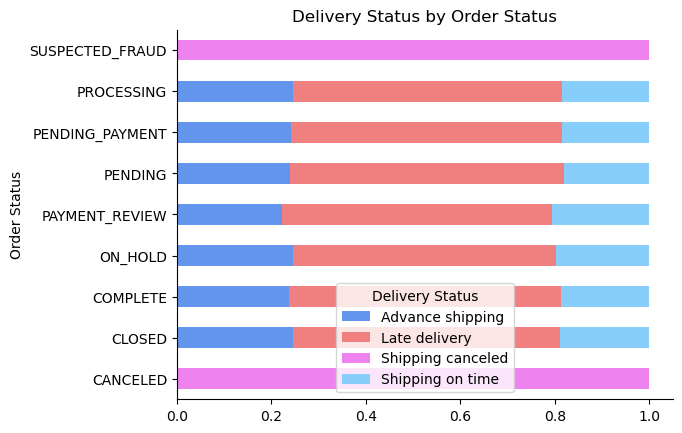

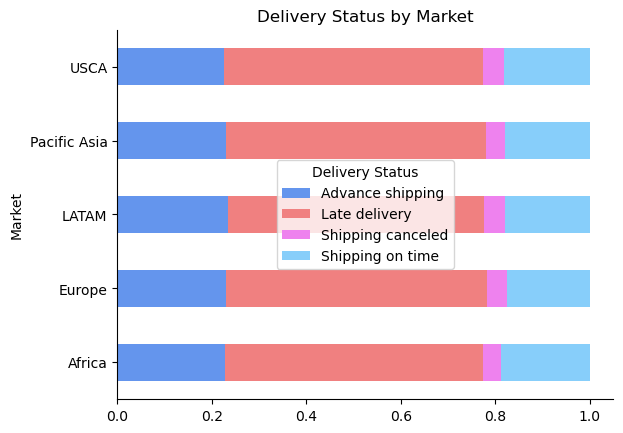

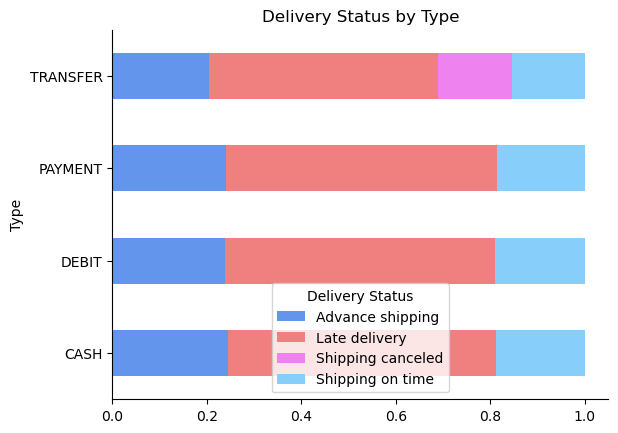

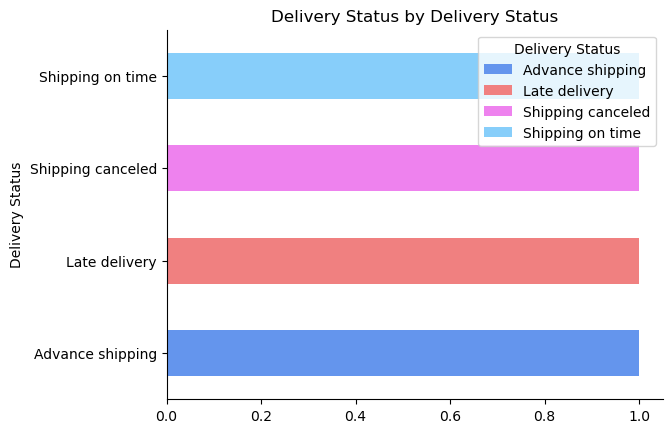

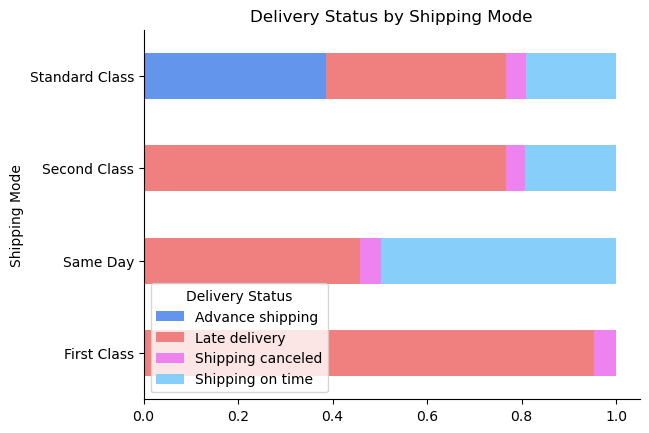

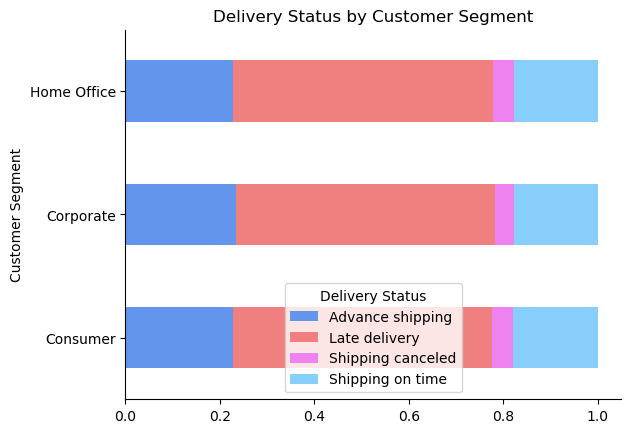

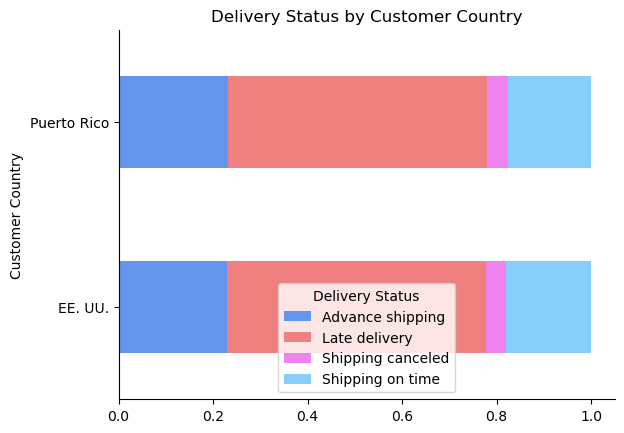

In [33]:
unique = df[catcols].nunique().sort_values(ascending=False)
few_unique = unique[unique<10].index #returns the column names that have fewer than 10 unique values

#plots the proportion of each delivery status for every categorical column 
for feature in df[few_unique].columns:
    
    plot_data = df[few_unique].groupby([feature, "Delivery Status"])["Delivery Status"].count() / df[few_unique].groupby(feature)["Delivery Status"].count()
    plot_data.unstack().plot(kind="barh", stacked=True, color=["cornflowerblue", "lightcoral", "violet", "lightskyblue"])
    plt.title(f"Delivery Status by {feature}")
    sns.despine()


plt.show()

**Summary Findings:**

1. DS by Order Status:
    - Canceled and Suspected_Fraud determines that delivery is 100% canceled.
    - The rest of the order status have similar proportions of delivery status where 'Late delivery' is the majority, and 'Shipping on time' is the least frequent. 
    - There are no 'Shipping canceled' delivery status other than in Canceled and Suspected_Fraud order status.
2. DS by Market:
    - All market has the same pattern of delivery status in the following order from most frequent to least frequent: 'Late delivery', 'Advanced shipping', 'Shipping on time', 'Shipping canceled'.
3. DS by Type:
    - Only the Transfer transaction type has 'Shipping canceled' delivery status.
    - The rest of the transaction types has this pattern from most frequent to least frequent: 'Late delivery', 'Advanced shipping', 'Shipping on time'.
4. DS by Shipping Mode:
    - Only Standard Class has 'Advance shipping' delivery status.
    - Only First Class has no 'Shipping on time' delivery status.
    - 'Shipping canceled' is the least frequent delivery status in each shipping mode. 
    - Unlike Standard Class and  Second Class, the Same Day shipping mode has a higher proportion of 'Shipping on time'.
5. DS by Customer Segment:
    - All customer segments have similar proportions of delivery status with this order from most frequent to least frequent: 'Late delivery', 'Advance shipping', 'Shipping on time', 'Shipping canceled'.
6. DS by Customer Country:
    - Both customer country have similar proportions of delivery status with this order from most frequent to least frequent: 'Late delivery', 'Advance shipping', 'Shipping on time', 'Shipping canceled'.


Let's move on to numerical variables!

### Predictor Variables: Numerical

I am going to plot out the numerical columns in a histogram to look at how they are distributed and color code each of them in terms of `Delivery Status`.

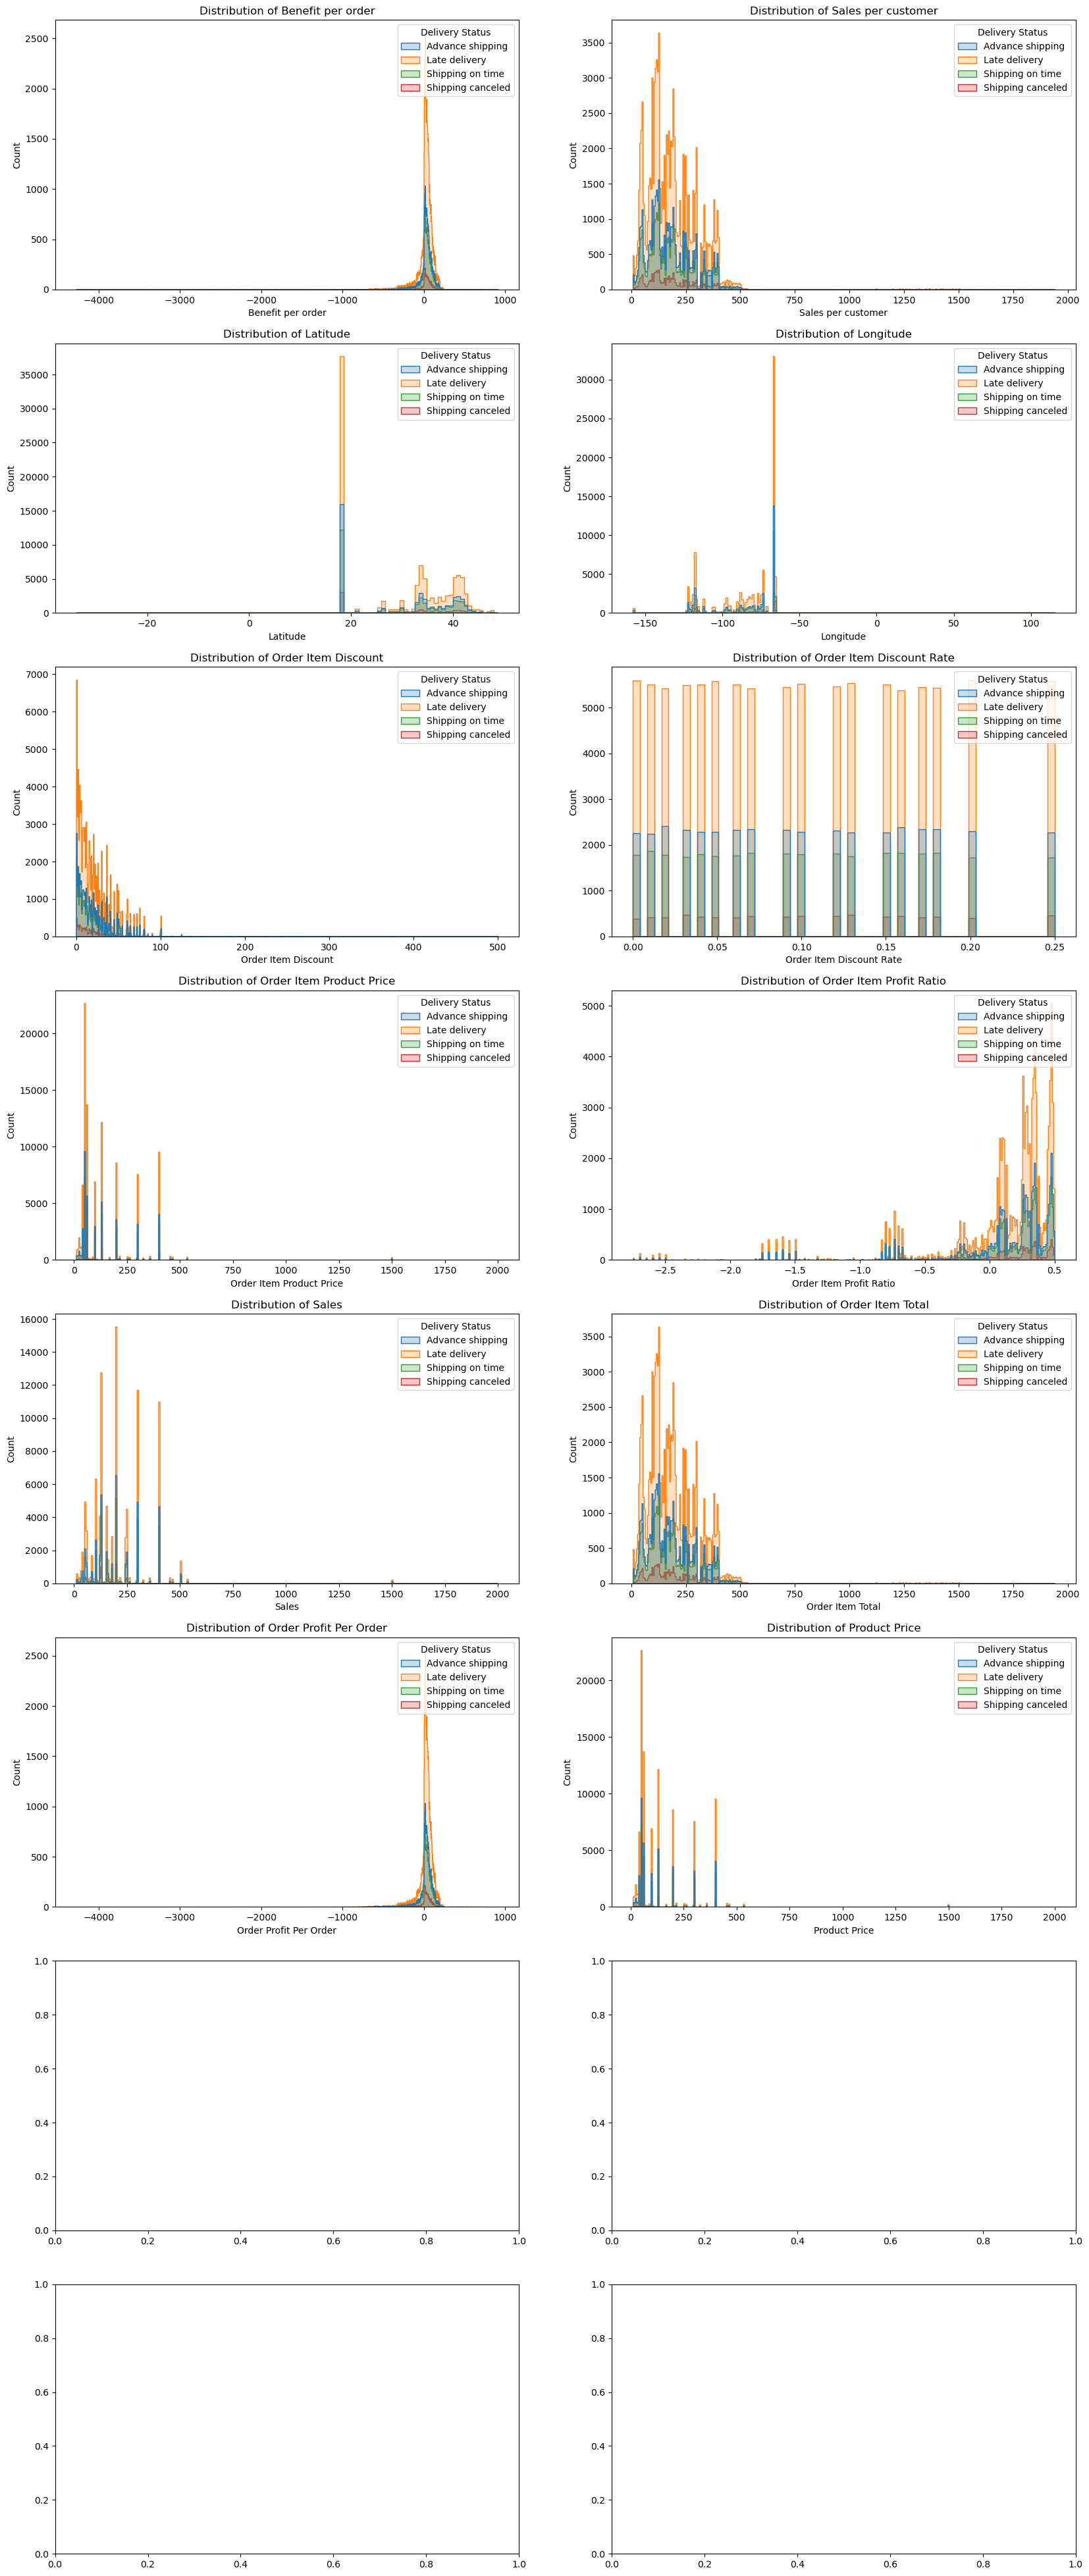

In [34]:
# Set up a 8x2 grid of subplots
plt.subplots(8,2, figsize=(20,50))

#plots the distribution of each numerical column
for num, column in enumerate(numcols, start=1):
    
    plt.subplot(8, 2, num)
    sns.histplot(data=df, x=column, hue="Delivery Status", element="step") #color codes the distribution into deliver statuses
    plt.title(f"Distribution of {column}")
    
plt.show()

From here we can see that many of the graphs are very spaced out. This means that we have many outliers in our data!

### Detecting Outliers

Here, I will look more into the outliers of the data. First, I want to see how many outliers we have.

In [35]:
#Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers
Q1 = df[numcols].quantile(0.25)
Q3 = df[numcols].quantile(0.75)
IQR = Q3 - Q1

#counts the number of data that are outliers  
count_outliers = ((df[numcols]<(Q1-1.5*IQR))|(df[numcols]>(Q3+1.5*IQR))).sum().sort_values(ascending=False)
#returns the proportion of data that are outliers per numerical column
prop_outliers = (((df[numcols]<(Q1-1.5*IQR))|(df[numcols]>(Q3+1.5*IQR))).sum()/(df.shape[0])*100).sort_values(ascending=False)

print("Number of Outliers per Numerical Column\n")
print(count_outliers) #print the count of outliers per column
print("\n\nOutlier Proportion per Numerical Column\n")
print(prop_outliers) #print the proportion of outliers per column

Number of Outliers per Numerical Column

Benefit per order           18942
Order Profit Per Order      18942
Order Item Profit Ratio     17300
Order Item Discount          7537
Order Item Product Price     2048
Product Price                2048
Sales per customer           1943
Order Item Total             1943
Longitude                    1414
Sales                         488
Latitude                        9
Order Item Discount Rate        0
dtype: int64


Outlier Proportion per Numerical Column

Benefit per order           10.493253
Order Profit Per Order      10.493253
Order Item Profit Ratio      9.583638
Order Item Discount          4.175253
Order Item Product Price     1.134525
Product Price                1.134525
Sales per customer           1.076359
Order Item Total             1.076359
Longitude                    0.783310
Sales                        0.270336
Latitude                     0.004986
Order Item Discount Rate     0.000000
dtype: float64


We can see that some of the numerical columns have many outliers. `Benefit per order` and `Order Profit Per Order` have around 10.5% of their data being outliers, and those equal to 18,942 rows of observations. `Order Item Profit` has about 9.6% outliers and `Order Item Discount` has around 4.2% outliers. `Order Item Product Price`, `Product Price`, `Sales per customer`, `Order Item Total`, `Longitude`, `Sales`, and `Latitude` columns have a few percentage of outliers. The rest of the columns (5 out of 16) not mentioned have no outliers.

Let's see a **boxplot** of all the numerical columns by `Delivery Status`:

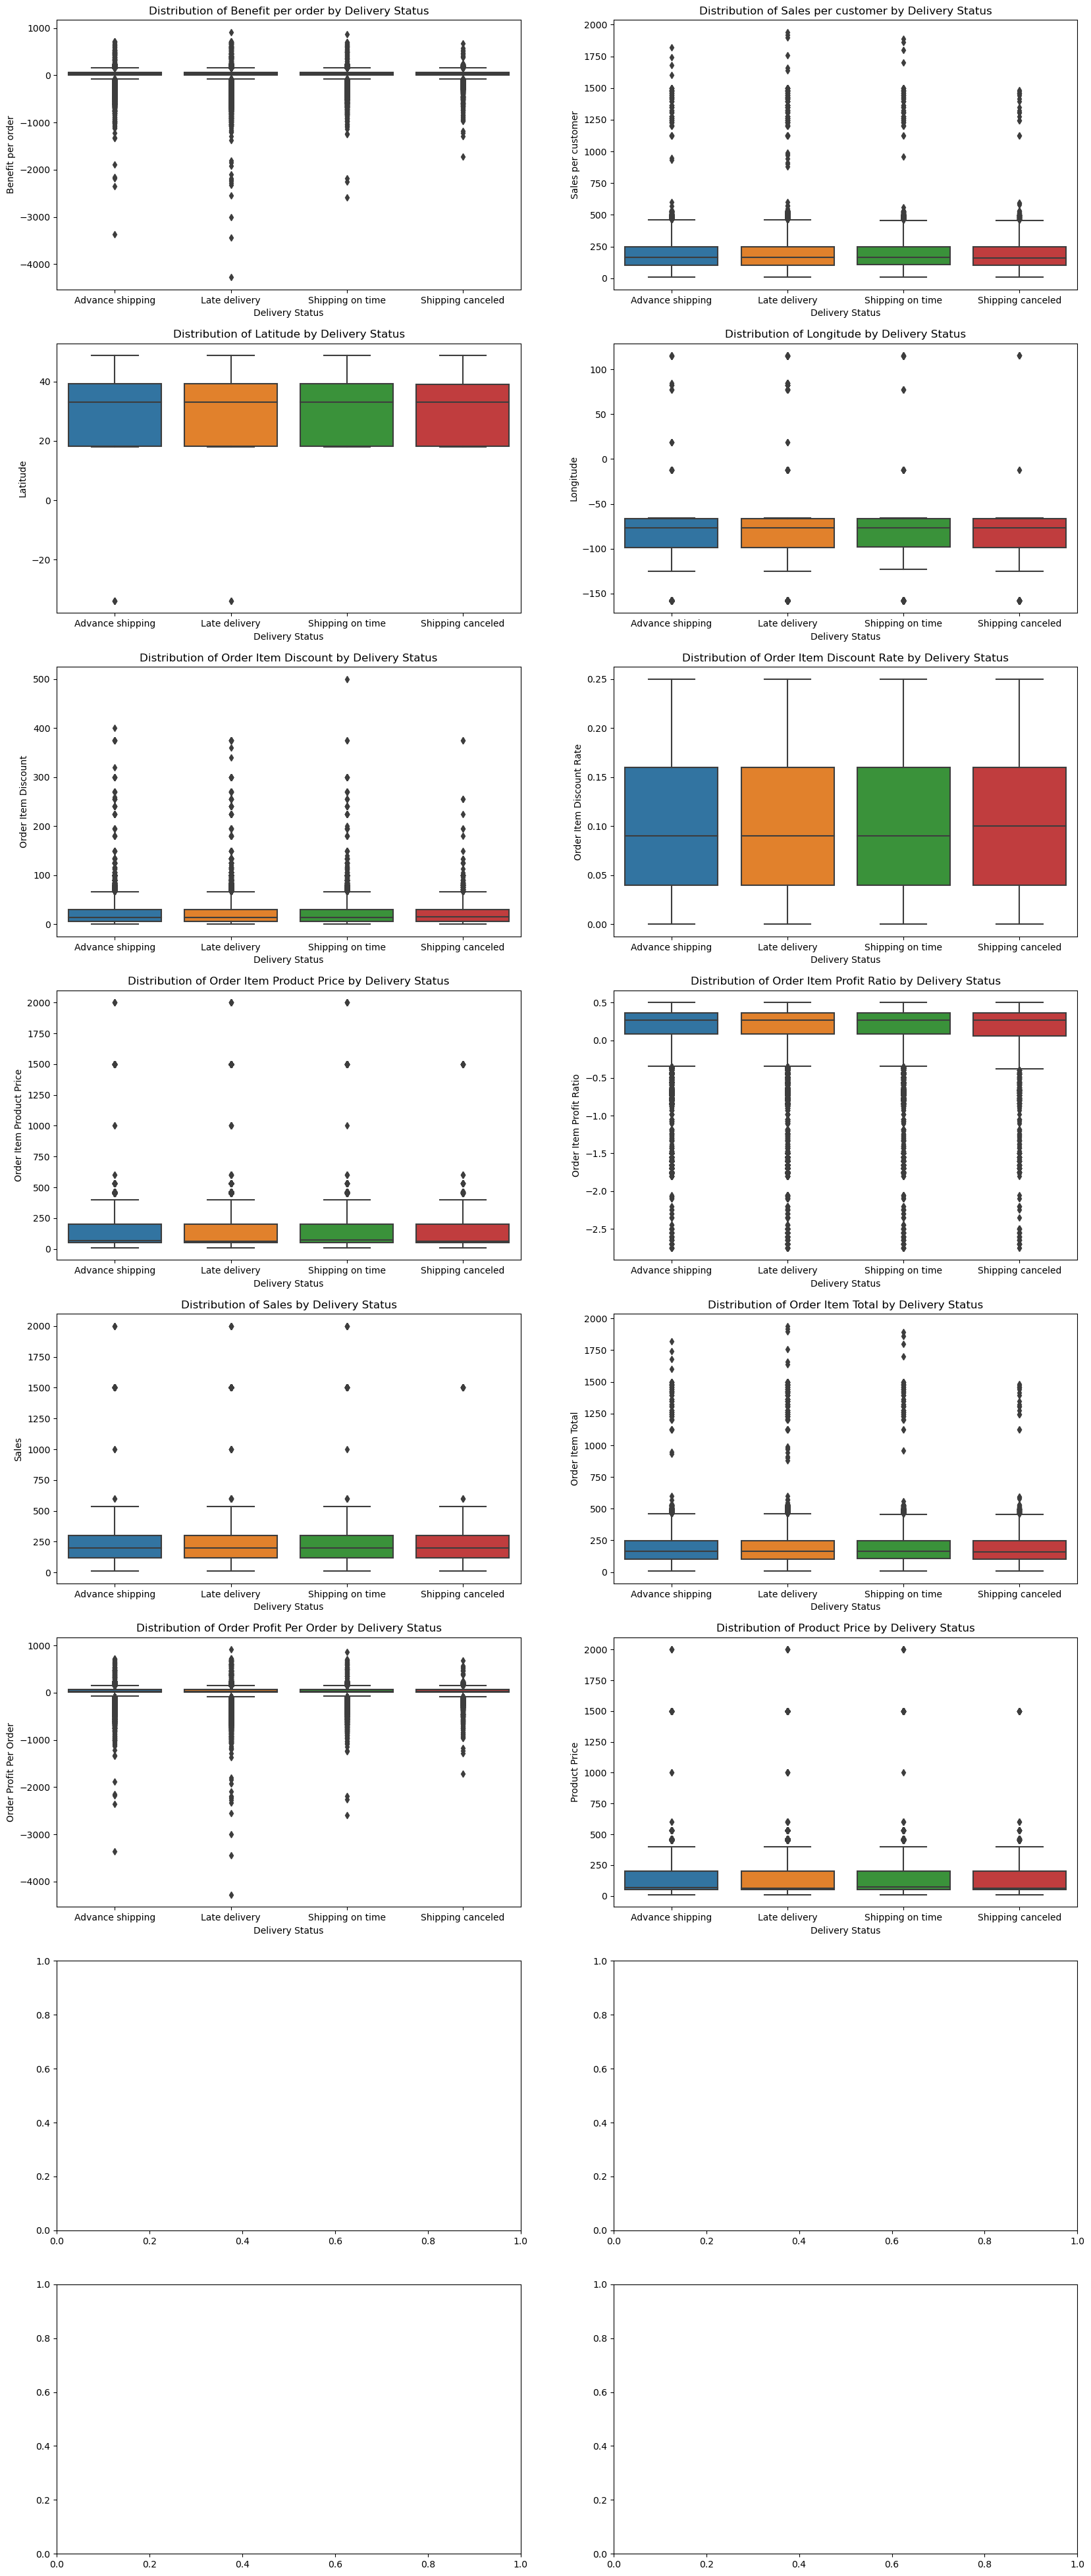

In [36]:
# Set up a 8x2 grid of subplots
plt.subplots(8,2, figsize=(20,50))

for num, column in enumerate(numcols, start=1):
    
    plt.subplot(8, 2, num)
    sns.boxplot(data=df, x="Delivery Status", y=column)
    plt.title(f"Distribution of {column} by Delivery Status")
    
plt.show()

The dots in the graphs are outliers, and columns with many dots have compressed box plots. With many outliers, we cannot see the underlying distribution of the "general data", so I will **temporarily drop the outliers** to understand the general distribution of each numerical column by delivery status. To do this, I would make a copy of our original dataframe called `df_temp` and dropped the outliers in that dataframe.

In [37]:
#print the original shape of our dataframe
print(f"Original dataframe shape: {df.shape}")

#create a separate dataframe to drop outliers
df_temp = df.copy()

#Dropping outliers by dropping data points outside interquartile range (both above and below the IQR)
#the for loop goes through each numerical column and detect outliers, then drop them
for cols in numcols:
    Q1 = df_temp[cols].quantile(0.25)
    Q3 = df_temp[cols].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    df_temp = df_temp[(df_temp[cols] < lower)|(df_temp[cols] > upper) == False] #store the dataframe without the outliers in df_drop_outliers
    print(f"Dropped outliers for '{cols}' column.\nNew shape: {df_temp.shape}")

Original dataframe shape: (180516, 39)
Dropped outliers for 'Benefit per order' column.
New shape: (161574, 39)
Dropped outliers for 'Sales per customer' column.
New shape: (160367, 39)
Dropped outliers for 'Latitude' column.
New shape: (160360, 39)
Dropped outliers for 'Longitude' column.
New shape: (159113, 39)
Dropped outliers for 'Order Item Discount' column.
New shape: (152088, 39)
Dropped outliers for 'Order Item Discount Rate' column.
New shape: (152088, 39)
Dropped outliers for 'Order Item Product Price' column.
New shape: (130687, 39)
Dropped outliers for 'Order Item Profit Ratio' column.
New shape: (126168, 39)
Dropped outliers for 'Sales' column.
New shape: (124843, 39)
Dropped outliers for 'Order Item Total' column.
New shape: (124829, 39)
Dropped outliers for 'Order Profit Per Order' column.
New shape: (123097, 39)
Dropped outliers for 'Product Price' column.
New shape: (122389, 39)


The number of rows of the temporary dataframe `df_temp` after dropping the outliers is now 122,389. We have dropped 58,127 outlier rows. Let's see if we have some outliers left.

In [38]:
#Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers
Q1 = df_temp[numcols].quantile(0.25)
Q3 = df_temp[numcols].quantile(0.75)
IQR = Q3 - Q1

#counts the number of data that are outliers  
count_outliers = ((df_temp[numcols]<(Q1-1.5*IQR))|(df_temp[numcols]>(Q3+1.5*IQR))).sum().sort_values(ascending=False)
#returns the proportion of data that are outliers per numerical column
prop_outliers = (((df_temp[numcols]<(Q1-1.5*IQR))|(df_temp[numcols]>(Q3+1.5*IQR))).sum()/(df_temp.shape[0])*100).sort_values(ascending=False)

print("Number of Outliers per Numerical Column\n")
print(count_outliers) #print the count of outliers per column
print("\n\nOutlier Proportion per Numerical Column\n")
print(prop_outliers) #print the proportion of outliers per column

Number of Outliers per Numerical Column

Order Item Discount         3170
Benefit per order            300
Order Profit Per Order       300
Order Item Profit Ratio      205
Sales per customer             5
Order Item Total               5
Latitude                       0
Longitude                      0
Order Item Discount Rate       0
Order Item Product Price       0
Sales                          0
Product Price                  0
dtype: int64


Outlier Proportion per Numerical Column

Order Item Discount         2.590102
Benefit per order           0.245120
Order Profit Per Order      0.245120
Order Item Profit Ratio     0.167499
Sales per customer          0.004085
Order Item Total            0.004085
Latitude                    0.000000
Longitude                   0.000000
Order Item Discount Rate    0.000000
Order Item Product Price    0.000000
Sales                       0.000000
Product Price               0.000000
dtype: float64


We have very few outliers left. I am just going to leave it as it is because this amount of outliers would not really impact the visualization of the distributions. I will re-plot the numerical columns to visualize the distribution of our numerical columns against `Delivery Status`.

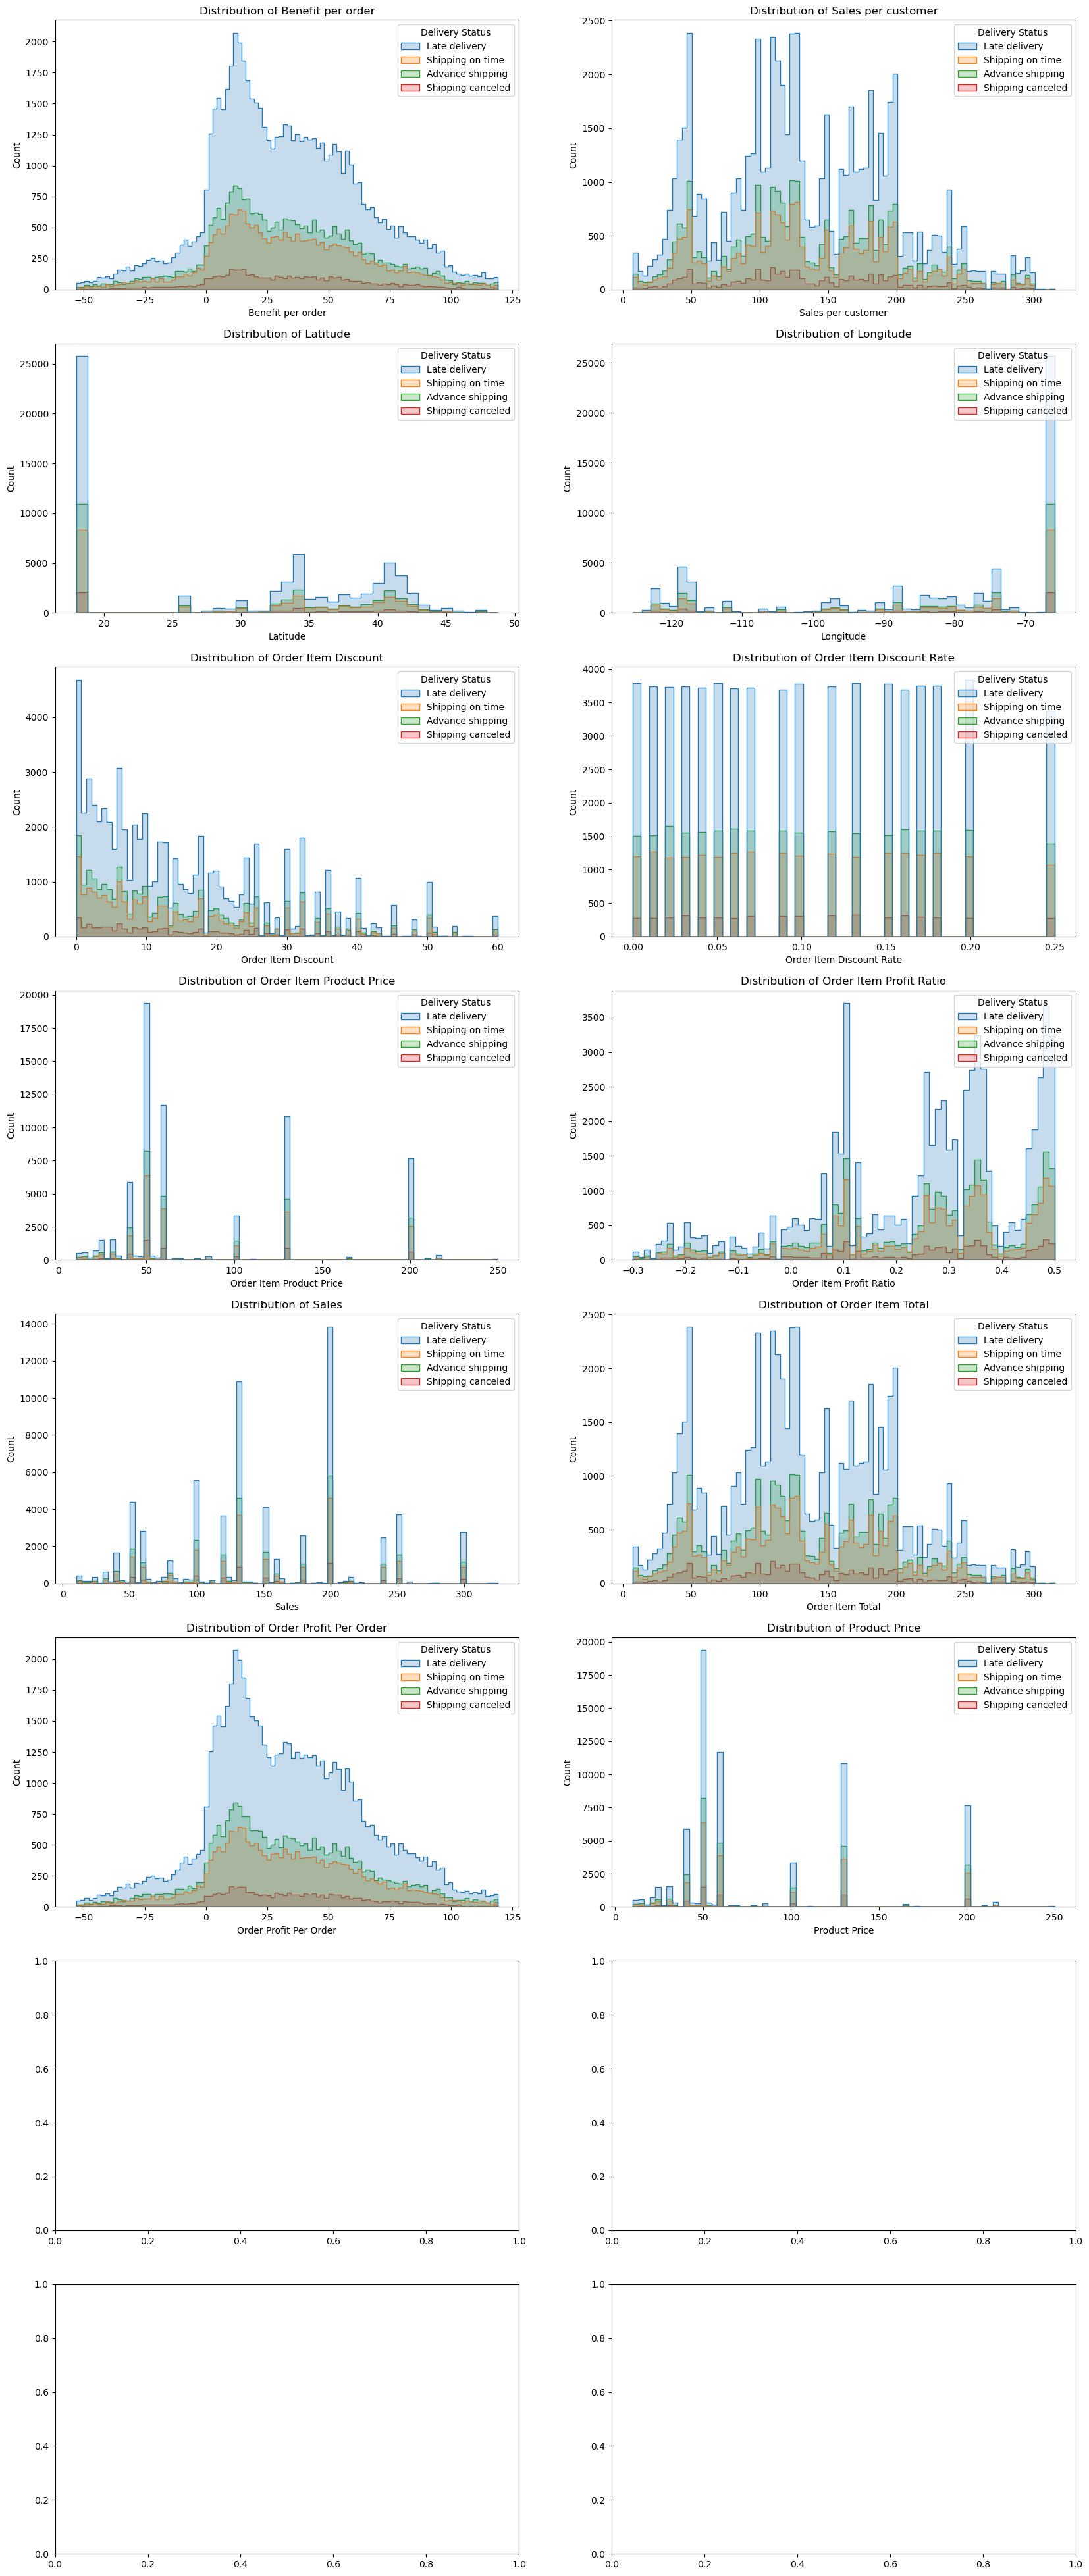

In [39]:
# Set up a 8x2 grid of subplots
plt.subplots(8,2, figsize=(20,50))

#plots the distribution of each numerical column
for num, column in enumerate(numcols, start=1):
    
    plt.subplot(8, 2, num)
    sns.histplot(data=df_temp, x=column, hue="Delivery Status", element="step") #color codes the distribution into deliver statuses
    plt.title(f"Distribution of {column}")
    
plt.show()

Summary Findings:

1. **Days for shipping (real):** The delivery is very likely to be late if the actual (real) days of shipping is 5 or 6 days. There is also a slight chance of the delivery being canceled with 5 or 6 days of actual shipping. The distribution does not have an underlying pattern.
2. **Days for shipment (scheduled):** The delivery is very likely to be late if the shipment is scheduled to be delivered in 1 or 2 days. The distribution does not have an underlying pattern.
3. **Benefit per order:** The distribution of Benefit per Order look normally distributed. Most of the orders (for all delivery status) have a benefit per order of around 12.5. Late Delivery status are the most frequent throughout the distribution while Shipping Canceled is the least frequent.
4. **Sales per Customer:** Late Delivery status are the most frequent throughout the distribution while Shipping Canceled is the least frequent. The distribution does not have an underlying pattern.
5. **Late Delivery Risk:** This column seems like it is a binary column of 1s if the order is delivered late and 0s if it was is not late.
6. **Order Item Discount:** The distribution of order item discount is right skewed. Most orders have lower discount values.
7. **Order Item Discount Rate:** The distribution of the order item discount rate looks very uniformly distributed meaning that it has similar frequencies of total orders across different rates. The proportion of delivery status across different rates are also consistent.
8. **Order Item Product Price:** There is no underlying pattern in the distribution. Most orders have product price of 50.
9. **Order Item Profit Ratio:** The order item profit ratio looks somewhat left skewed. Most of the data are concentrated on higher profit ratio. Relatively few orders are at a loss.
10. **Order Item Quantity:** The distribution of order item quantity is right skewed where the majority of the orders items only holds one product.
11. **Sales:** There is no underlying pattern in the distribution. Most order items generate sales of 200.
12. **Order Item Total:** The distribution of order item total does not really have a general pattern. There are multiple peaks that occur at random points.
13. **Order Profit Per Order:** The distribution **looks exactly like the distribution of Benefit per order**. This column will be re-visited later to check for potential duplicate column.
14. **Product Price:** The distribution **looks exactly like the distribution of Order Item Product Price**. This column will be re-visited later to check for potential duplicate column. 

## Further Data Cleaning

From the EDA, we can see that there may be potential duplicate columns: `Order Profit Per Order` with `Benefit per order` and `Product Price` with `Order Item Product Price`.

Let's view their distributions side by side:

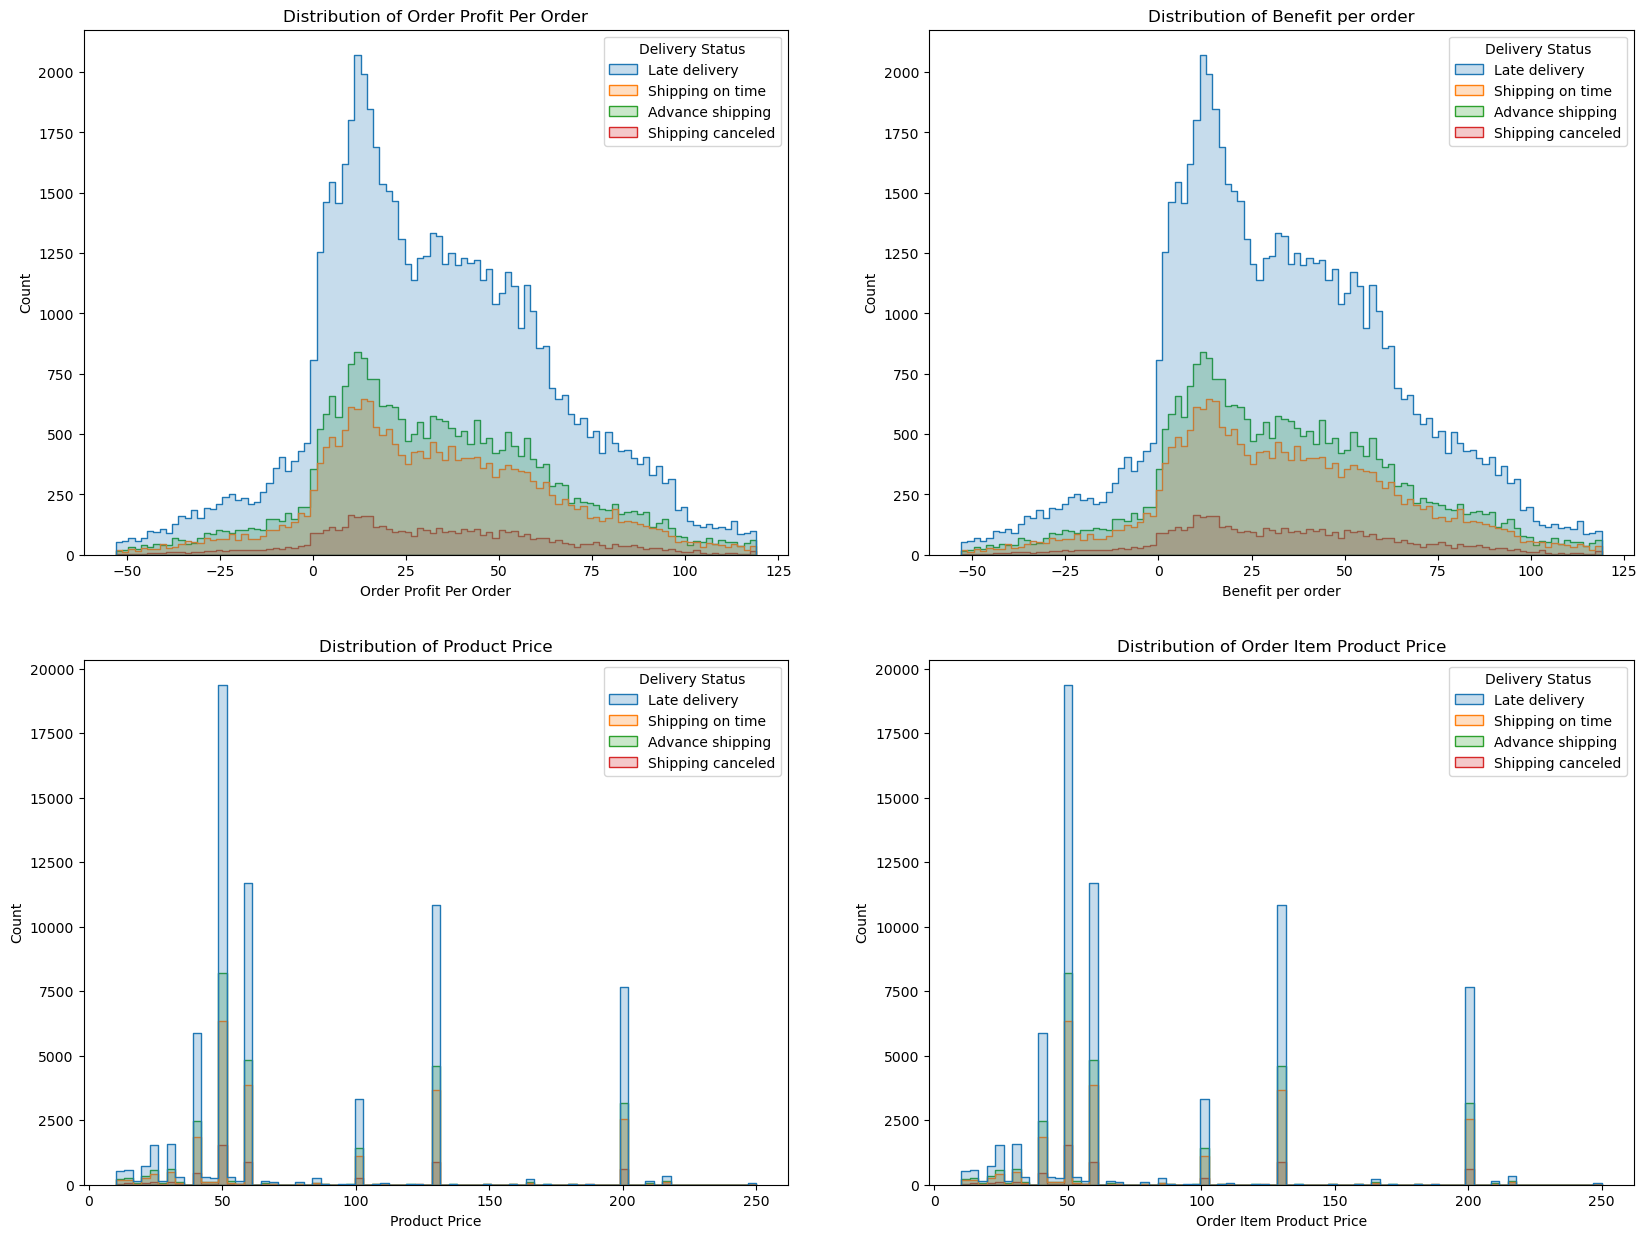

In [40]:
# Set up a 2x2 grid of subplots
plt.subplots(2,2, figsize=(20,15))

#plots the distribution the potentially duplicate columns
for num, column in enumerate(df_temp[["Order Profit Per Order", "Benefit per order", "Product Price", "Order Item Product Price"]].columns, start=1):
    
    plt.subplot(2, 2, num)
    sns.histplot(data=df_temp, x=column, hue="Delivery Status", element="step") #color codes the distribution into deliver statuses
    plt.title(f"Distribution of {column}")
    
plt.show()

They look exactly the same even with same scales! The column labels also describes the same thing. Benefit per order is another way of saying profit per order, and order item product price is just an extended way of saying product price. We can safely say that these columns are duplicates and one of the pairs will be dropped. I will drop `Order Profit Per Order` and `Order Item Product Price` columns.

In [41]:
#dropping the columns in our original dataframe
df.drop(["Order Profit Per Order", "Order Item Product Price"], inplace=True, axis=1)

#sanity check: from 39 columns to 37 columns
df.shape

(180516, 37)

## Saving the Data

Now that we have cleaned out dataset and performed EDA on it, we can move on to preprocessing our dataset to get ready for modelling!

In [42]:
df.to_csv('Datasets\clean_DataCoSupplyChainDataset.csv', index=False)